<a href="https://colab.research.google.com/github/AidanJIC/Clasificaci-n-de-productos-en-supermercados-utilizando-visi-n-computacional/blob/main/Laboratorios%20Unidad%20II/Copia_de_PDSeI_Practica_Redes_Neuronales_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDSeI - Redes Neuronales convolucionales

# Integrantes:

1. Aguilar Alvarez, Luis Fernando

2. Ipanaque Castro, Aidan Joseph

3. Ventura Serrano, Sebastian


Base de datos: https://www.kaggle.com/datasets/datamunge/sign-language-mnist

# Conexión con kaggle

# Instalaciones previas

In [ ]:
!pip install -q kaggle
!pip install -q scikeras

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

files.upload()



Saving amer_sign2.png to amer_sign2 (1).png


{'amer_sign2 (1).png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x99\x00\x00\x01\xd7\x08\x06\x00\x00\x00\xf7\x15A\xd3\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\xff\xa5IDATx^\xec\xfd\xf7\x93\x1c\xd7\x96\xe7\t\xae\xed\x1f\xb0?\xac\xad\xd9\xd8\xec\xae\xed\xd8\xacmow\xaf\xcdL\xef\xb4\xee\xae\xaa\xae\xaaW\xaf\xfaI>j-@\x02$H\x82\x02\x04\x08\x02\x04\x15\x08\x90\x00\x08\xad52\x91Zk\x1d\x19Zk\x99!R\xeb\x84Hh\x99:\xbf\xfb=\xd7\xc33\x03x|\xf5\xc8\xd9\xca\x1ak3\x98\xe5\xd7\xdc\xc3\xc3\xc33\xc2\xaf\x9f{>\xe7\\\xf5\x7f\x98\x9f\x9f\xc7c=\xd6c=\xd6c=\xd6c=\xd6c=\xd6?\xa6\x1eC\xe6c=\xd6c=\xd6c=\xd6c=\xd6c\xfd\xa3\xeb1d>\xd6c=\xd6c=\xd6c=\xd6c=\xd6?\xba\x1eC\xe6c=\xd6c=\xd6c=\xd6c=\xd6c\xfd\xa3\xeb1d>\xd6c=\xd6c=\xd6c=\xd6c=\xd6?\xba\x1eC\xe6c=\xd6c=\xd6c=\xd6c=\xd6c\xfd\xa3\xeb\xcfB\xe6\xdc\xdc\x1c\xa6\xa7\xa7q\xef\xde=\xdc\xb9s\x07\xb7o\xdf~\xac\x15\x90\xdc[\xb9\xc7r\xaf\xe5\x

# Descargar la base de datos

In [ ]:
!mkdir -p ~/.kaggle
!cp /root/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sign-language-mnist.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


# Lectura de datos

In [ ]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [ ]:
print(train_df.keys())

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [ ]:
# Elementos por clase

class_counts = train_df['label'].value_counts()
print(class_counts)

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64


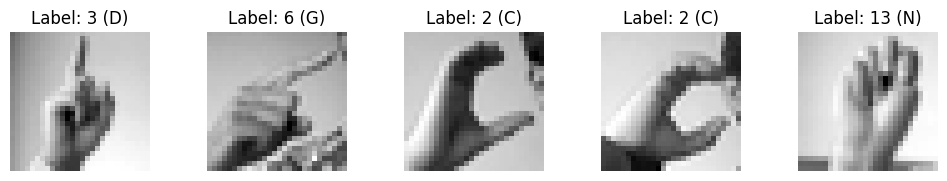

In [ ]:
import matplotlib.pyplot as plt

label_mapping = {
    0: 'A',
    1: 'B',
    2: 'C',
    3: 'D',
    4: 'E',
    5: 'F',
    6: 'G',
    7: 'H',
    8: 'I',
    9: 'J',
    10: 'K',
    11: 'L',
    12: 'M',
    13: 'N',
    14: 'O',
    15: 'P',
    16: 'Q',
    17: 'R',
    18: 'S',
    19: 'T',
    20: 'U',
    21: 'V',
    22: 'W',
    23: 'X',
    24: 'Y',
    25: 'Z'
}

def plot_images(data, labels, num=5):
    fig, axes = plt.subplots(1, num, figsize=(10, 2))
    fig.tight_layout()

    for i in range(num):
        ax = axes[i]
        ax.imshow(data[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {labels[i]} ({label_mapping[labels[i]]})')
        ax.axis('off')

    plt.show()

plot_images(train_df.iloc[:, 1:].values, train_df['label'].values)

# Transformación de datos

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

batch_size = 32

X_train = train_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values

X_val = test_df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0
y_val = test_df['label'].values

# Data Augmentation

In [ ]:
datagen_train = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

train_generator = datagen_train.flow(
    X_train,
    y_train,
    batch_size=batch_size)

datagen_val = ImageDataGenerator()
val_generator = datagen_val.flow(X_val, y_val, batch_size=batch_size)



```
1. ¿Qué es el data augmentation y cómo puede beneficiar el entrenamiento de una CNN?
 Consiste en generar artificialmente diversas imágenes de entrenamiento a partir de cada imagen inicial, incluyendo algunas modificaciones sobre ellas de manera que creamos nuevas imágenes de entrenamiento con leves distorsiones. De esta forma maximizando el entrenamiento de la CNN

2. ¿Por qué es importante normalizar los datos de entrada y qué impacto tiene en el rendimiento del modelo?
 Ayuda a reducir la varianza del modelo asegurando que los valores de la característica se encuentren dentro de un rango específico. Además, la normalización ayuda a mitigar el impacto de los valores atípicos, lo que puede afectar significativamente el rendimiento de un modelo.
```



# Creación del modelo

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(26, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,954 (519.35 KB)

 Trainable params: 132,954 (519.35 KB)

 Non-trainable params: 0 (0.00 B)



```
1. ¿Qué función cumplen las capas Conv2D y MaxPooling2D en una CNN?
 La capa Conv2D detecta patrones en las imágenes, como bordes o texturas, usando filtros. La capa MaxPooling2D reduce el tamaño de la imagen, manteniendo la información importante y disminuyendo el cálculo. Esto ayuda a la red a identificar características clave sin procesar demasiada información.

2. ¿Qué es el Dropout y cómo ayuda a prevenir el sobreajuste en redes neuronales?
 Dropout es una técnica que desactiva al azar algunas neuronas durante el entrenamiento, lo que fuerza al modelo a aprender características más generales. Esto reduce el riesgo de que el modelo se sobreajuste.

3. ¿Por qué se utiliza la función de activación ReLU en las capas ocultas y cuáles son sus ventajas?
 La función ReLU convierte valores negativos en cero, dejando los positivos igual. Esto ayuda a que la red aprenda patrones complejos, mejora la velocidad del entrenamiento y evita ciertos problemas de otras funciones de activación.

4. ¿Qué hace la función de activación softmax en la capa de salida y en qué tipo de problemas se utiliza comúnmente?
 La función softmax convierte las salidas de la red en probabilidades que suman 1, indicando la probabilidad de cada clase. Se usa comúnmente para identificar el tipo de objeto en una imagen.

5. ¿Qué es el tamaño del filtro (filter size) en una capa convolucional y cómo impacta la calidad de las características extraídas?
 El tamaño del filtro indica cuántos píxeles se analizan a la vez para detectar patrones. Filtros más pequeños capturan detalles finos, mientras que filtros grandes capturan patrones generales,el tamaño del filtro afecta qué tipo de información aprende la red.

6. ¿Qué efecto tiene un stride mayor que 1 en la resolución de la salida de una capa convolucional?
 Un stride mayor que 1 reduce la resolución de la salida. Esto disminuye la cantidad de datos procesados haciendo que el cálculo sea más rápido.

7. ¿Cómo se debe seleccionar el tamaño del filtro y el stride para optimizar el balance entre la extracción de características y la complejidad del modelo?
 El tamaño del filtro y el stride deben ser lo suficientemente pequeños para captar detalles importantes, pero no tan pequeños como para que el modelo se lentee o se sobreajusten, se deben probar varios valores y usar los que ofrezcan un buen balance entre precisión y eficiencia del modelo.

```



# Terminación anticipada y Checkpoints

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')

In [ ]:
class CustomModelCheckpoint(ModelCheckpoint):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.best_val_accuracy = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_val_accuracy = logs.get('val_accuracy')

        if current_val_accuracy and current_val_accuracy > self.best_val_accuracy:
            self.best_val_accuracy = current_val_accuracy
            print(f" Modelo guardado época {epoch + 1} con exactitud: {current_val_accuracy:.4f}")

        super().on_epoch_end(epoch, logs)

custom_model_checkpoint = CustomModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')



```
1. ¿Qué es el EarlyStopping y cómo contribuye a mejorar el proceso de entrenamiento de un modelo?
 EarlyStopping es una técnica que detiene el entrenamiento del modelo si no está mejorando después de cierto número de intentos, esto evita que el modelo entrene de más y termine sobreajustándose.

2. ¿Cuál es la función de ModelCheckpoint y por qué es útil guardar el mejor modelo durante el entrenamiento?
ModelCheckpoint guarda el mejor modelo logrado durante el entrenamiento, basándose en la presición. Esto es útil porque, si el modelo empeora en entrenamientos posteriores, siempre tendremos guardada la versión que mejor ha funcionado hasta ahora.

```


# Entrenamiento

In [ ]:
epochs = 5

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    # callbacks=[early_stopping, model_checkpoint]
    callbacks=[early_stopping, custom_model_checkpoint]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


851/858 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1293 - loss: 2.8822 Modelo guardado época 1 con exactitud: 0.6128
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.1304 - loss: 2.8775 - val_accuracy: 0.6128 - val_loss: 1.1738
Epoch 2/5
850/858 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5135 - loss: 1.4367 Modelo guardado época 2 con exactitud: 0.7344
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.5140 - loss: 1.4354 - val_accuracy: 0.7344 - val_loss: 0.7058
Epoch 3/5
852/858 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6458 - loss: 1.0264 Modelo guardado época 3 con exactitud: 0.8218
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.6460 - loss: 1.0260 - val_accuracy: 0.8218 - val_loss: 0.5018
Epoch 4/5
850/858 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7124 - loss: 0.8192 Modelo guardado época 4 con exactitud: 0.8812
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.7126 - loss: 0.8188 - val_accuracy: 0.8812 - val_loss: 0.3564
Epoch 



```
1. ¿Qué significa el parámetro epochs y cómo afecta al entrenamiento de un modelo?
 Epochs es la cantidad de veces que el modelo revisa todo el conjunto de datos de entrenamiento para aprender de él. Más epochs permiten que el modelo aprenda mejor, pero si son demasiadas, puede sobreajustarse y no funcionar bien con datos nuevos.

2. ¿Cuál es la diferencia entre train_generator y val_generator en el contexto del entrenamiento y la validación del modelo?
 train_generator proporciona los datos de entrenamiento al modelo, es decir, los datos con los que el modelo aprende. val_generator, en cambio, le da datos de validación, que son diferentes y sirven para evaluar si el modelo está aprendiendo bien.

```


# Predicciones

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


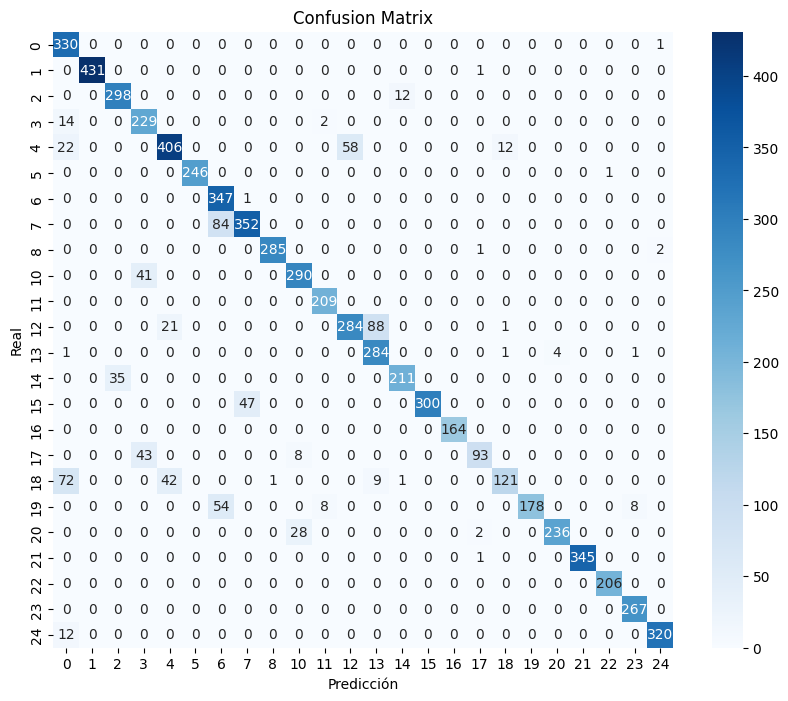

              precision    recall  f1-score   support

           0       0.73      1.00      0.84       331
           1       1.00      1.00      1.00       432
          10       0.89      0.96      0.93       310
          11       0.73      0.93      0.82       245
          12       0.87      0.82      0.84       498
          13       1.00      1.00      1.00       247
          14       0.72      1.00      0.83       348
          15       0.88      0.81      0.84       436
          16       1.00      0.99      0.99       288
          17       0.89      0.88      0.88       331
          18       0.95      1.00      0.98       209
          19       0.83      0.72      0.77       394
           2       0.75      0.98      0.85       291
          20       0.94      0.86      0.90       246
          21       1.00      0.86      0.93       347
          22       1.00      1.00      1.00       164
          23       0.95      0.65      0.77       144
          24       0.90    

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

best_model = load_model('best_model.keras')

X_test = test_df.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_df['label'].values

X_test = X_test.reshape(-1, 28, 28, 1)

predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, predicted_classes, target_names=np.unique(y_test.astype(str))))

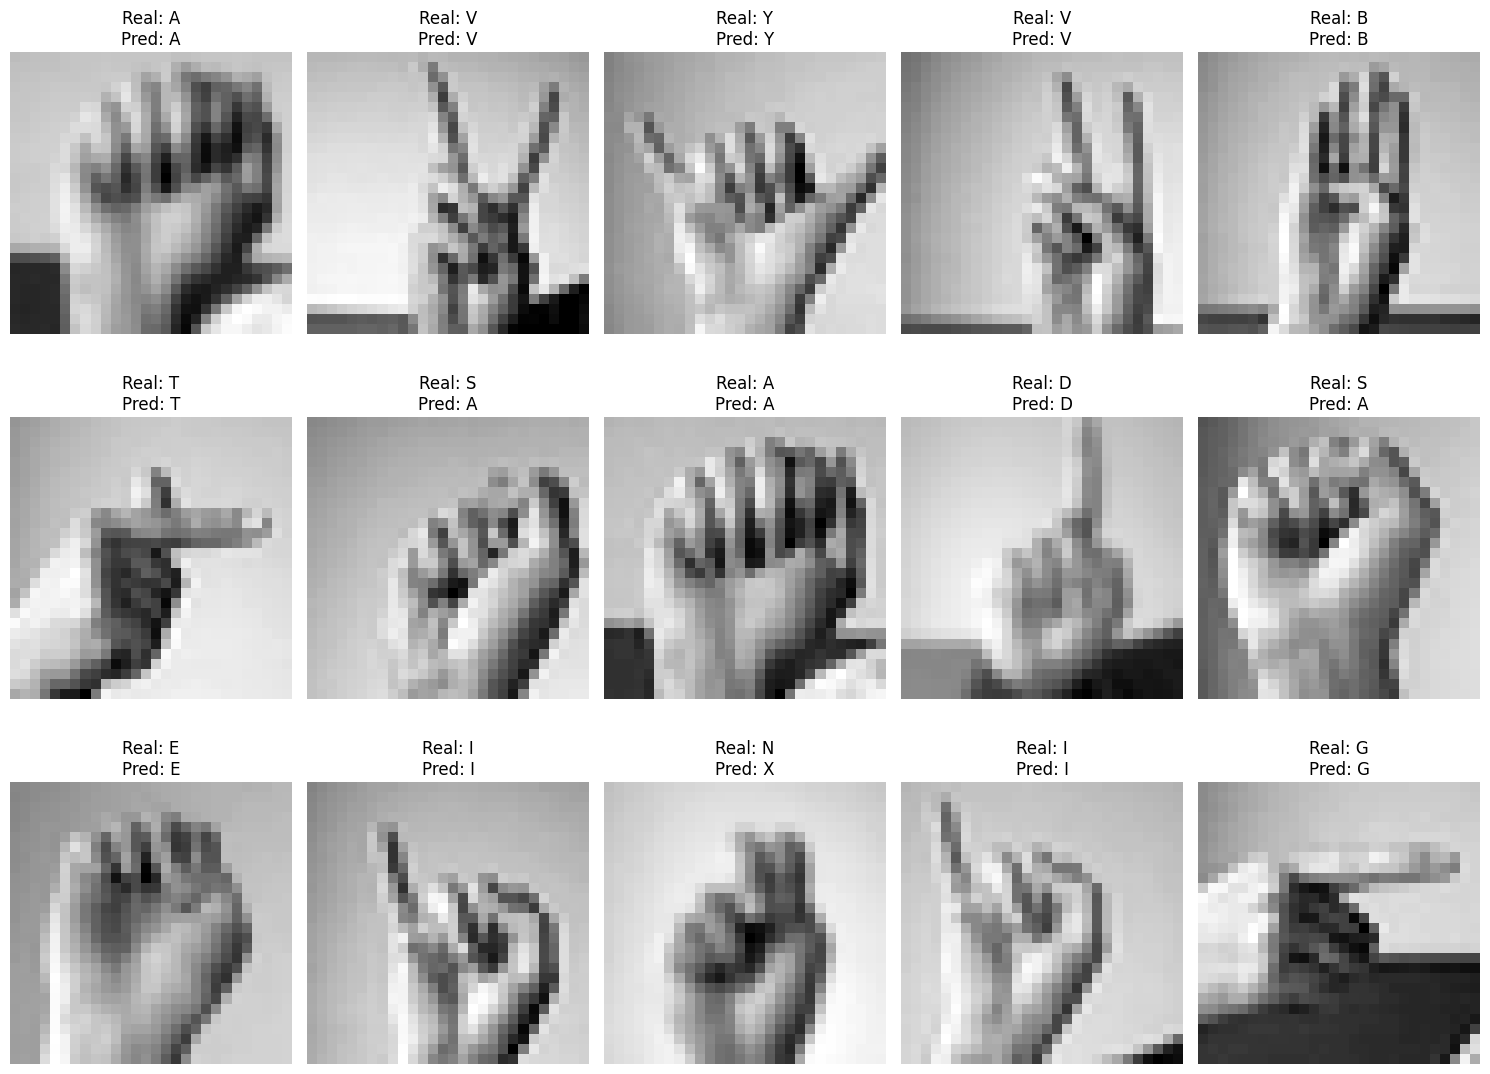

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_images_to_show = 15
indices = np.random.choice(len(X_test), num_images_to_show, replace=False)
images_per_row = 5

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    plt.subplot(num_images_to_show // images_per_row + 1, images_per_row, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {label_mapping[y_test[idx]]}\nPred: {label_mapping[predicted_classes[idx]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()



```
1. ¿Qué es el confusion_matrix y qué información proporciona sobre el rendimiento del modelo?
 La confusion_matrix es una tabla que muestra cuántas veces el modelo acertó y cuántas veces se equivocó para cada clase. Tiene cuatro elementos principales: verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos, esto ayuda a ver en qué clases el modelo está funcionando bien y en cuáles se está equivocando.

2. ¿Cómo se interpreta el classification_report y qué métricas se incluyen en él?
 El classification_report es un resumen de las métricas de rendimiento del modelo. Incluye precisión, recall o sensibilidad, y F1-score. Estos valores ayudan a entender cómo de bien está clasificando el modelo.

3. ¿Por qué es importante utilizar el conjunto de prueba (X_test y y_test) para evaluar el modelo?
 Al evaluarlo con este conjunto, podemos medir su rendimiento real en datos nuevos, lo cual nos dice si el modelo generaliza bien y si funcionará en la práctica.

4. ¿Qué rol juega la función np.argmax en el proceso de obtención de clases predichas?
 La función np.argmax se usa para encontrar la clase con la probabilidad más alta entre muchas. En modelos de clasificación, se usa para elegir la clase que el modelo considera como la predicción más probable para cada muestra.

5. ¿Qué información visual adicional proporciona un mapa de calor (heatmap) de la matriz de confusión?
 El mapa de calor de la matriz de confusión muestra qué tan bien el modelo predice cada clase. Las celdas con tonos más oscuros representan mayor cantidad de aciertos o errores, lo que ayuda a ver rápidamente cómo está funcionando el modelo para cada clase.

```



# Refinamiento

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from scikeras.wrappers import KerasClassifier

def create_model(optimizer='adam', **kwargs):
    dropout_rate = kwargs.get('dropout_rate', 0.5)
    model = Sequential([
        Input((28, 28, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(26, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from sklearn.model_selection import GridSearchCV

epochs = 1
model = KerasClassifier(build_fn=create_model, epochs=epochs, batch_size=32, verbose=0)

param_grid = {
    'model__optimizer': ['SGD', 'Adam'],
    'model__dropout_rate': [0.2, 0.5, 0.7]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

grid_result = grid.fit(X_train, y_train)

print(f"Mejor: {grid_result.best_score_} usando {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Mejor: 0.8662174357624308 usando {'model__dropout_rate': 0.2, 'model__optimizer': 'Adam'}


In [ ]:
val_accuracy = grid_result.best_estimator_.score(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.8622420524261015




```
1. ¿Qué es GridSearchCV y cómo se utiliza para optimizar el rendimiento de un modelo?
  GridSearchCV: es una herramienta de Scikit-Learn que es utilizada para realizar una búsqueda de los mejores hiperparámetros para un modelo. Siendo su objetivo probar todas las combinaciones posibles de parámetros que se especifican en una cuadrícula, para encontrar la configuración que optimice el rendimiento del modelo en función de una métrica de evaluación específica.

2. ¿Qué representan los parámetros en param_grid y por qué es importante ajustar el optimizador y la tasa de dropout?
 param_grid: es un diccionario que contiene los hiperparámetros y los valores que se probarán en el modelo. La tasa de dropout es importante porque controla el porcentaje de neuronas que se "desactivan" durante el entrenamiento, ayudando a evitar el sobreajuste al mejorar la capacidad del modelo para generalizar a nuevos datos.

3. ¿Qué significa el parámetro cv=3 en el contexto de la validación cruzada y cómo influye en la evaluación del modelo?
 El parámetro cv=3 en GridSearchCV indica que se utilizará una validación cruzada de 3 particiones o pliegues. Esto significa que el conjunto de datos se divide en 3 partes, y en cada iteración, dos partes se utilizan para entrenar el modelo y una para validarlo.



# Temas grupales

1. Arquitectura de Redes Neuronales Convolucionales
2. Funciones de Activación en CNN
3. Técnicas de Preprocesamiento de Imágenes
4. Entrenamiento y Optimización de Modelos
5. Regularización en CNN
6. Evaluación de Modelos CNN
7. Aplicaciones de Redes Neuronales Convolucionales

Ejemplo:



```
Arquitectura de Redes Neuronales Convolucionales
(Autor/es): [Nombres de los estudiantes del grupo]
Contenido:
Este tema abarca la estructura fundamental de las redes neuronales convolucionales, que incluye las siguientes capas:

Capas Convolucionales: Estas capas son responsables de extraer características relevantes de las imágenes mediante la aplicación de filtros (kernels) que realizan operaciones de convolución.

Capas de Pooling: Se utilizan para reducir la dimensionalidad de las características extraídas, manteniendo las más importantes. Las capas de pooling ayudan a hacer que el modelo sea menos sensible a pequeñas variaciones en las imágenes.

Capas Totalmente Conectadas: Estas capas se encuentran al final de la red y son responsables de la clasificación final de las características extraídas. Conectan todas las neuronas de la capa anterior a cada neurona de la capa siguiente.

<img_url>: [URL de una imagen de arquitectura de CNN]

Referencias: [Referencia bibliográfica o enlace a un recurso]
```

